# I. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve)

# II. Import Dataset

if you want to download the dataset from the Kaggle API, run the following cell

In [7]:
#import Kagglehub

#path = Kagglehub.dataset_download("ealzxi/paysim1")

#print("Path to dataset files:", path)

if you have the dataset locally, run the following cell

In [10]:
data = pd.read_csv("Fraud.csv")

# III. Let's get to know the dataseet a little

In [13]:
print("head of dataset:")
data.head()

head of dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
data.shape

(6362620, 11)

some other information,

In [18]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


distribution of goal,

In [38]:
print(f"\nin actual: \n{data['isFraud'].value_counts()}")
print(f"\nin percent: \n{data['isFraud'].value_counts(normalize=True) * 100}")


in actual: 
isFraud
0    6354407
1       8213
Name: count, dtype: int64

in percent: 
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [40]:
data['isFraud'].isnull().sum()

0

so we dont need to handle missing values

Finally, we find features that are highly correlated

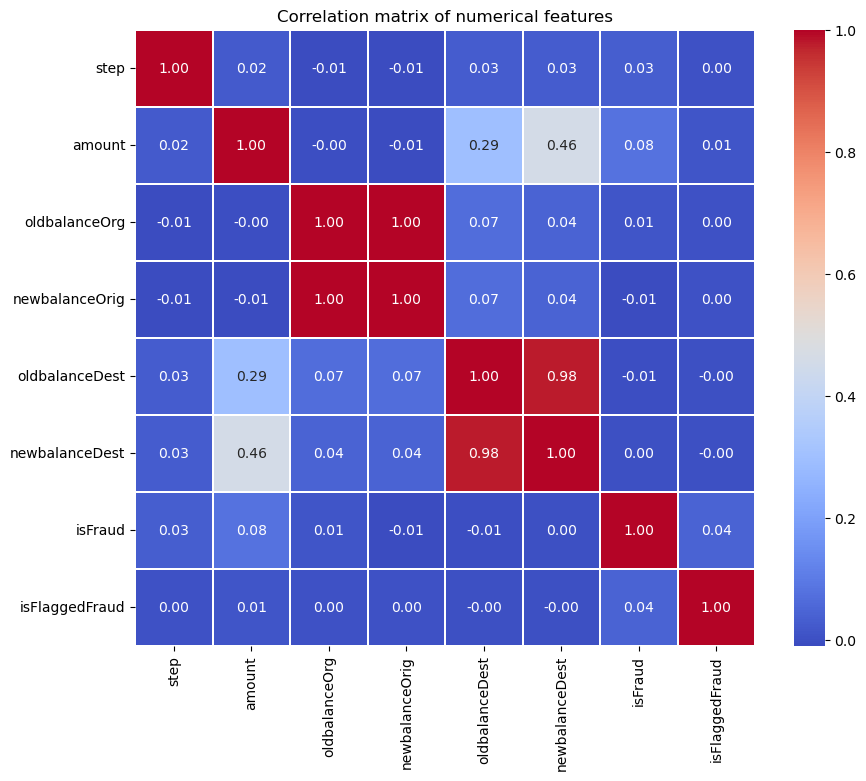

In [46]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.25)
plt.title('Correlation matrix of numerical features')
plt.show()

Show high correlation pairs which have absolute value > 0.8

In [50]:
high_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print(high_corr[ (abs(high_corr) > 0.8) & (abs(high_corr) < 1.0) ]) 


oldbalanceOrg   newbalanceOrig    0.998803
newbalanceDest  oldbalanceDest    0.976569
dtype: float64


We will remove one feature from each highly correlated pair

# IV. Data cleaning

In [54]:
data_cleaned = data.drop(['oldbalanceOrg', 'newbalanceOrig', 'nameOrig', 'nameDest'], axis=1)

In [56]:
data_cleaned.head()

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0.0,0.0,0,0
1,1,PAYMENT,1864.28,0.0,0.0,0,0
2,1,TRANSFER,181.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,0.0,0.0,0,0


In [60]:
data_cleaned.shape

(6362620, 7)

In [62]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['type'], prefix='type', drop_first=True) 

In [64]:
data_cleaned.head()

,step,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,0.0,0.0,0,0,False,False,True,False
2,1,181.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,0.0,0.0,0,0,False,False,True,False


# V. preparing data for Model

In [67]:
X = data_cleaned.drop('isFraud', axis=1)
y = data_cleaned['isFraud']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (6362620, 9)
Target shape: (6362620,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Now scale numrical features

In [72]:
scaler = StandardScaler()

In [74]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [76]:
num = X.select_dtypes(include=np.number).columns.tolist()
ohe_features = X.filter(like='type_').columns.tolist() 
numII = [col for col in num if col not in ohe_features]

In [78]:
X_train_scaled[numII] = scaler.fit_transform(X_train[numII])
X_test_scaled[numII] = scaler.transform(X_test[numII]) 

In [80]:
X_train_scaled.head()

,step,amount,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4310249,0.453991,0.133805,1.042527,0.859216,-0.001773,False,False,False,False
318938,-1.597708,2.005310,-0.324812,-0.052308,-0.001773,False,False,False,True
3375139,0.074567,1.595985,-0.320385,-0.018948,-0.001773,False,False,False,True
5492781,0.959889,-0.017525,0.108104,0.019806,-0.001773,False,False,False,False
807263,-1.429075,-0.290836,0.150109,0.103563,-0.001773,False,False,False,False


# VI. Buildd Model

In [83]:
rf_model = RandomForestClassifier(
    n_estimators=100,       
    random_state=42,
    class_weight='balanced', 
    n_jobs=-1,               
    max_depth=None,          
    min_samples_split=2,     
    min_samples_leaf=1      
)

In [85]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

# VII. Evaluate Model

1. Confusion Matrix

In [88]:
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1] 

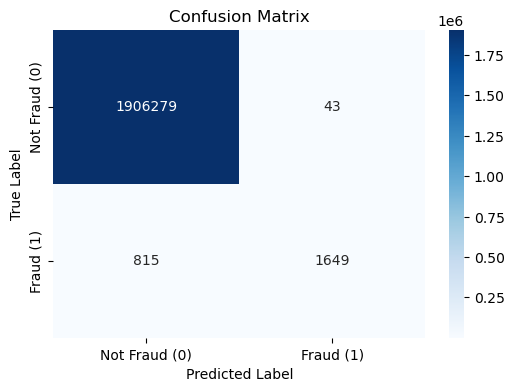

In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud (0)', 'Fraud (1)'], yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

2. Classification Report

In [98]:
print(classification_report(y_test, y_pred, target_names=['Not Fraud (0)','Fraud (1)']))

               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00   1906322
    Fraud (1)       0.97      0.67      0.79      2464

     accuracy                           1.00   1908786
    macro avg       0.99      0.83      0.90   1908786
 weighted avg       1.00      1.00      1.00   1908786



3. ROC AUC Score

In [102]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9169


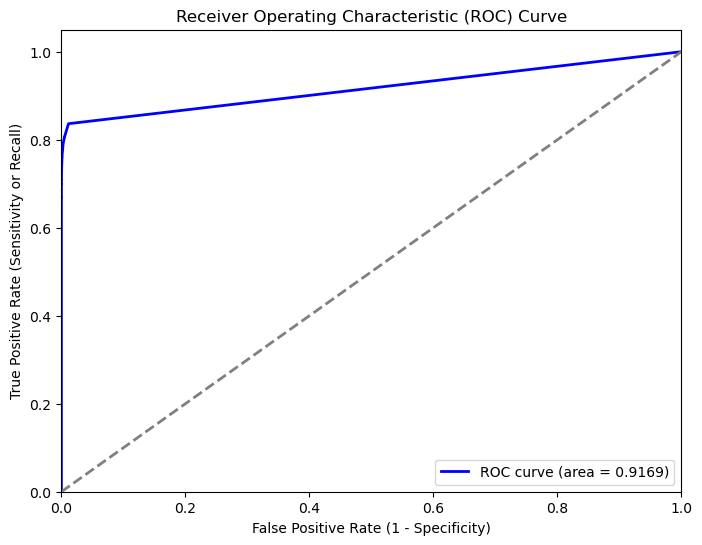

In [106]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity or Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()